In [1]:
# =====================================================
# EDA StudentPerformanceFactors
# =====================================================

# -----------------------------------------------------
# 1. LIBRERIAS
# -----------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import openpyxl

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

sns.set(style="whitegrid")

# -----------------------------------------------------
# 2. CARGA DE DATOS (unica vez)
# -----------------------------------------------------
df = pd.read_csv('../data/StudentPerformanceFactors.csv')

# Vista general
df.head()

# -----------------------------------------------------
# 3. DIMENSIONES Y TIPOS DE DATOS
# -----------------------------------------------------
print(df.shape)
df.info()

(6607, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-

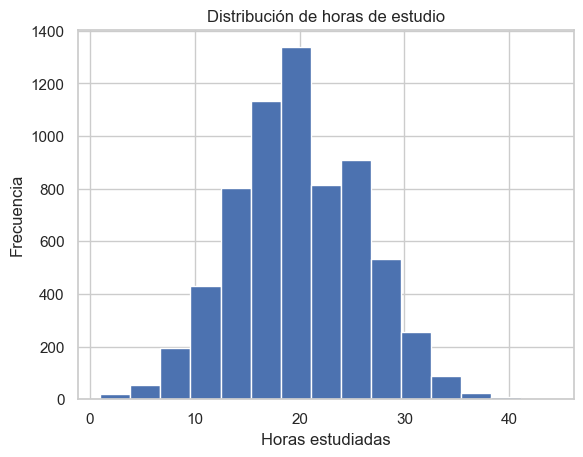

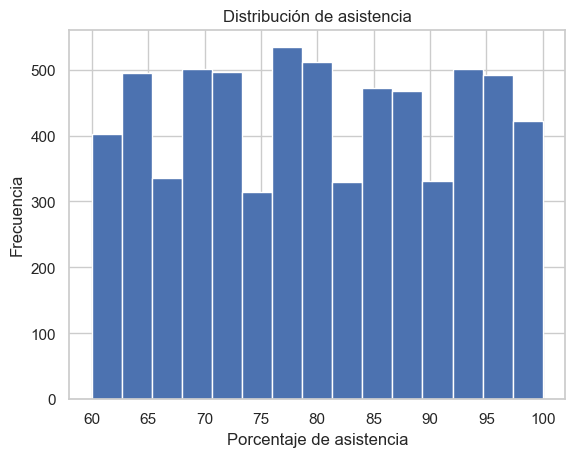

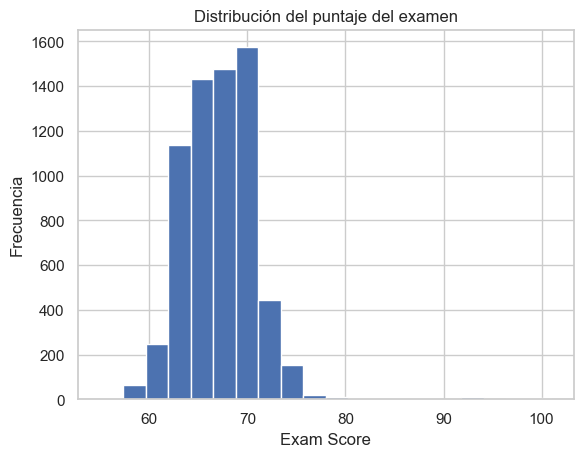

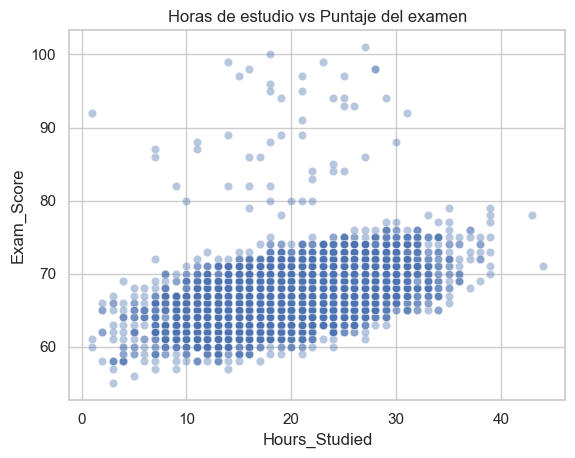

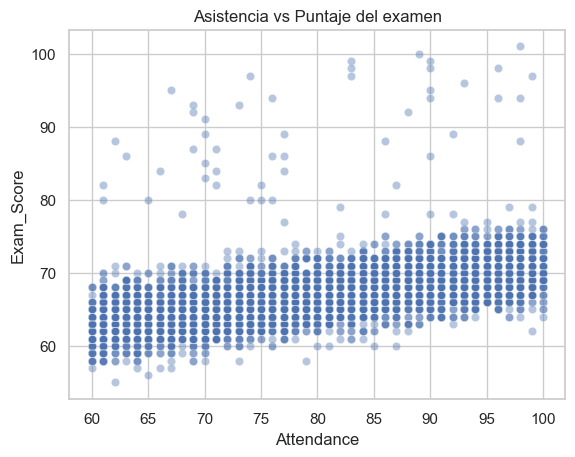

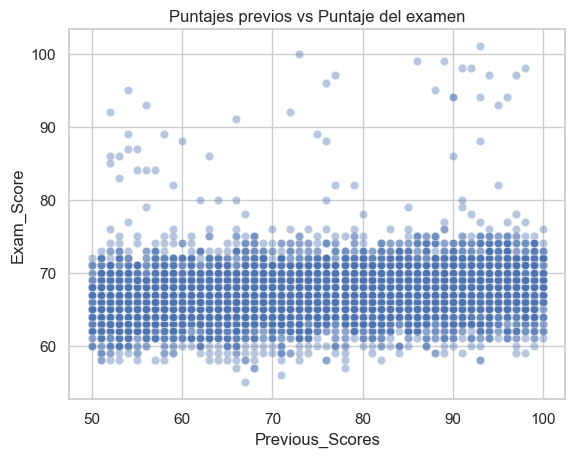

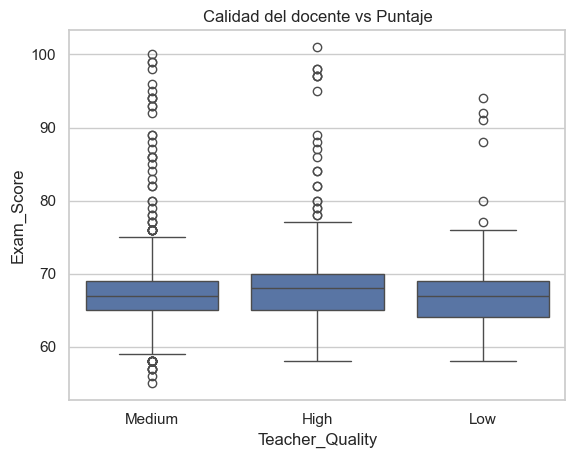

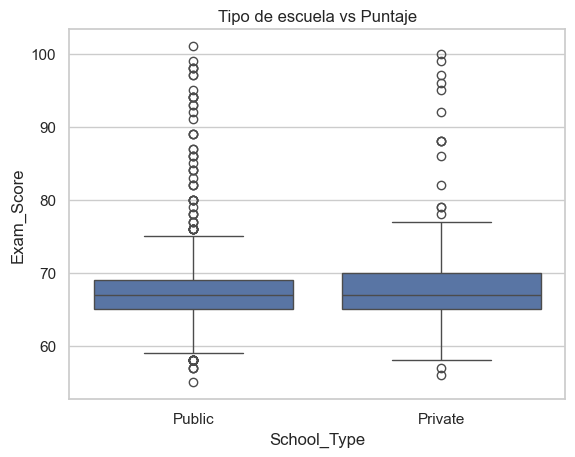

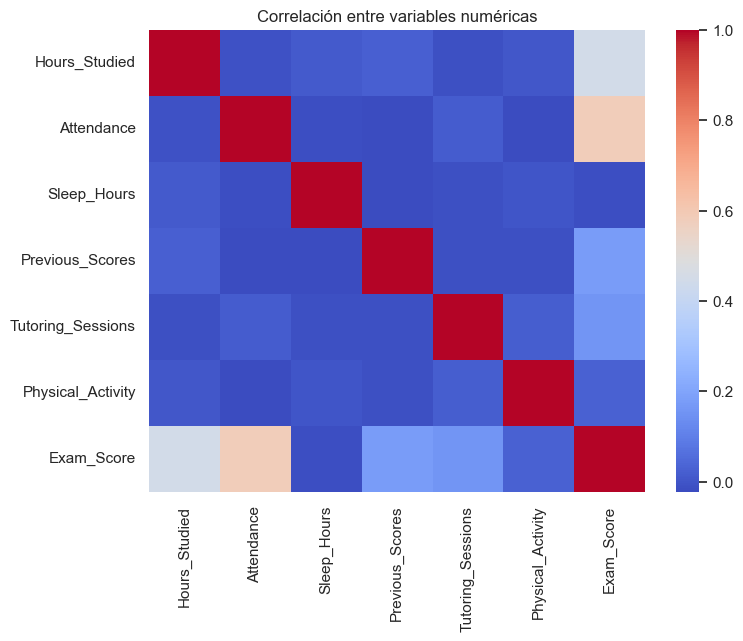

In [2]:

# -----------------------------------------------------
# 4. ESTADÍSTICAS DESCRIPTIVAS
# -----------------------------------------------------
# Variables numéricas
num_cols = df.select_dtypes(include='number')
num_cols.describe()

# -----------------------------------------------------
# 5. DISTRIBUCIÓN DE VARIABLES NUMÉRICAS CLAVE
# -----------------------------------------------------
# Horas de estudio
plt.figure()
plt.hist(df['Hours_Studied'], bins=15)
plt.title('Distribución de horas de estudio')
plt.xlabel('Horas estudiadas')
plt.ylabel('Frecuencia')
plt.show()

# Asistencia
plt.figure()
plt.hist(df['Attendance'], bins=15)
plt.title('Distribución de asistencia')
plt.xlabel('Porcentaje de asistencia')
plt.ylabel('Frecuencia')
plt.show()

# Puntaje del examen (variable objetivo)
plt.figure()
plt.hist(df['Exam_Score'], bins=20)
plt.title('Distribución del puntaje del examen')
plt.xlabel('Exam Score')
plt.ylabel('Frecuencia')
plt.show()

# -----------------------------------------------------
# 6. RELACIÓN CON EL RENDIMIENTO ACADÉMICO
# -----------------------------------------------------
# Horas de estudio vs puntaje
plt.figure()
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, alpha=0.4)
plt.title('Horas de estudio vs Puntaje del examen')
plt.show()

# Asistencia vs puntaje
plt.figure()
sns.scatterplot(x='Attendance', y='Exam_Score', data=df, alpha=0.4)
plt.title('Asistencia vs Puntaje del examen')
plt.show()

# Puntajes previos vs puntaje final
plt.figure()
sns.scatterplot(x='Previous_Scores', y='Exam_Score', data=df, alpha=0.4)
plt.title('Puntajes previos vs Puntaje del examen')
plt.show()

# -----------------------------------------------------
# 7. VARIABLES CATEGÓRICAS Y RENDIMIENTO
# -----------------------------------------------------


# Calidad del docente
plt.figure()
sns.boxplot(x='Teacher_Quality', y='Exam_Score', data=df)
plt.title('Calidad del docente vs Puntaje')
plt.show()

# Tipo de escuela
plt.figure()
sns.boxplot(x='School_Type', y='Exam_Score', data=df)
plt.title('Tipo de escuela vs Puntaje')
plt.show()

# -----------------------------------------------------
# 8. MATRIZ DE CORRELACIÓN
# -----------------------------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=False)
plt.title('Correlación entre variables numéricas')
plt.show()

# -----------------------------------------------------
# 9. CONCLUSIONES DEL EDA
# -----------------------------------------------------
# - Exam_Score se correlaciona fuertemente con Previous_Scores
# - Horas de estudio y asistencia muestran relación positiva
# - Alta motivación y mejor calidad docente elevan el rendimiento
# - El dataset es balanceado y adecuado para modelos predictivos


In [5]:
#valores nullos 
df.isnull().sum()



Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [3]:
df = df.copy()

In [4]:
# =====================================================
# TRATAMIENTO COMPLETO DE NULOS (unica pasada)
# =====================================================
# Numericas: rellenar con mediana
all_numeric_null_cols = df.select_dtypes(include="number").columns
for col in all_numeric_null_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

# Categoricas: rellenar con moda
all_categorical_null_cols = df.select_dtypes(include="object").columns
for col in all_categorical_null_cols:
    if df[col].isna().any():
        mode_val = df[col].mode()
        df[col] = df[col].fillna(mode_val.iloc[0] if not mode_val.empty else "Unknown")

# Verificacion: no deben quedar nulos
print("Nulos restantes por columna:")
print(df.isnull().sum())
assert df.isnull().sum().sum() == 0, "Aun quedan nulos en el DataFrame"

Nulos restantes por columna:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [5]:
# Verificacion post-limpieza de nulos
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# ISEE Índice de Soporte Educativo del Entorno
Qué mide:
Calidad del acompañamiento adulto + recursos disponibles.

In [6]:
# Computar ISEE a partir del df existente (sin recargar CSV)
scaler = MinMaxScaler()

level_map = {"Low": 1, "Medium": 2, "High": 3}
for col in ["Parental_Involvement", "Access_to_Resources", "Teacher_Quality"]:
    df[col] = df[col].map(level_map)

df["ISEE"] = scaler.fit_transform(pd.DataFrame(
    0.4 * df["Parental_Involvement"] +
    0.35 * df["Access_to_Resources"] +
    0.25 * df["Teacher_Quality"],
    columns=["ISEE"]
))

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,ISEE
0,23,84,1,3,No,7,73,Low,Yes,0,Low,2,Public,Positive,3,No,High School,Near,Male,67,0.475
1,19,64,1,2,No,8,59,Low,Yes,2,Medium,2,Public,Negative,4,No,College,Moderate,Female,61,0.300
2,24,98,2,2,Yes,7,91,Medium,Yes,2,Medium,2,Public,Neutral,4,No,Postgraduate,Near,Male,74,0.500
3,29,89,1,2,Yes,8,98,Medium,Yes,1,Medium,2,Public,Negative,4,No,High School,Moderate,Male,71,0.300
4,19,92,2,2,Yes,6,65,Medium,Yes,3,Medium,3,Public,Neutral,4,No,College,Near,Female,70,0.625


In [7]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,ISEE
0,23,84,1,3,No,7,73,Low,Yes,0,Low,2,Public,Positive,3,No,High School,Near,Male,67,0.475
1,19,64,1,2,No,8,59,Low,Yes,2,Medium,2,Public,Negative,4,No,College,Moderate,Female,61,0.300
2,24,98,2,2,Yes,7,91,Medium,Yes,2,Medium,2,Public,Neutral,4,No,Postgraduate,Near,Male,74,0.500
3,29,89,1,2,Yes,8,98,Medium,Yes,1,Medium,2,Public,Negative,4,No,High School,Moderate,Male,71,0.300
4,19,92,2,2,Yes,6,65,Medium,Yes,3,Medium,3,Public,Neutral,4,No,College,Near,Female,70,0.625


In [8]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
ISEE                          0
dtype: int64

# IAA  - INDICE DE AUTONOMÍA 

In [9]:
df = df.copy()
for col in ["Motivation_Level", "Extracurricular_Activities"]:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.capitalize()
    )
# Numéricas → mediana
for col in ["Hours_Studied", "Attendance", "Tutoring_Sessions"]:
    df[col] = df[col].fillna(df[col].median())

# Categóricas → moda
df["Motivation_Level"] = df["Motivation_Level"].fillna(df["Motivation_Level"].mode()[0])
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].fillna("No")
level_map = {"Low": 1, "Medium": 2, "High": 3}
yes_no_map = {"Yes": 1, "No": 0}

df["Motivation_Level"] = df["Motivation_Level"].map(level_map)
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map(yes_no_map)
df[["Motivation_Level", "Extracurricular_Activities"]].isna().sum()


Motivation_Level              0
Extracurricular_Activities    0
dtype: int64

In [10]:
scaler = MinMaxScaler()

norm_cols = ["Hours_Studied", "Attendance", "Motivation_Level", "Tutoring_Sessions"]
df[norm_cols] = scaler.fit_transform(df[norm_cols])

In [11]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
ISEE                          0
dtype: int64

In [12]:
# =====================================================
# IAA - Indice de Autonomia del Aprendiz (computacion final)
# =====================================================
scaler = MinMaxScaler()

df["IAA"] = scaler.fit_transform(
    pd.DataFrame(
        0.30 * df["Hours_Studied"] +
        0.30 * df["Attendance"] +
        0.25 * df["Motivation_Level"] -
        0.15 * df["Tutoring_Sessions"],
        columns=["IAA"]
    )
)

In [13]:
df[["IAA"]].describe()


,IAA
count,6607.000000
mean,0.499809
std,0.175479
min,0.000000
25%,0.374498
50%,0.499707
75%,0.625444
max,1.000000


In [14]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,ISEE,IAA
0,0.511628,0.600,1,3,0,7,73,0.0,Yes,0.000,Low,2,Public,Positive,3,No,High School,Near,Male,67,0.475,0.454127
1,0.418605,0.100,1,2,0,8,59,0.0,Yes,0.250,Medium,2,Public,Negative,4,No,College,Moderate,Female,61,0.300,0.164956
2,0.534884,0.950,2,2,1,7,91,0.5,Yes,0.250,Medium,2,Public,Neutral,4,No,Postgraduate,Near,Male,74,0.500,0.721912
3,0.651163,0.725,1,2,1,8,98,0.5,Yes,0.125,Medium,2,Public,Negative,4,No,High School,Moderate,Male,71,0.300,0.703298
4,0.418605,0.800,2,2,1,6,65,0.5,Yes,0.375,Medium,3,Public,Neutral,4,No,College,Near,Female,70,0.625,0.589502


In [15]:
df[["Motivation_Level", "Peer_Influence"]].isna().sum()


Motivation_Level    0
Peer_Influence      0
dtype: int64

In [16]:
# Verificacion de nulos previo a IBE
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
ISEE                          0
IAA                           0
dtype: int64

In [17]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
ISEE                          0
IAA                           0
dtype: int64

# IBE - indice de bienestar

In [18]:
# =====================================================
# IBE - Indice de Bienestar Estudiantil
# =====================================================
# FIX: Normalizar Sleep_Hours y Physical_Activity a [0,1] ANTES de
# combinar con Motivation_Level (ya en [0,1]) para evitar desbalance de escalas.

ibe_scaler = MinMaxScaler()

# Normalizar componentes numericos crudos a escala [0,1]
df[["Sleep_Hours_norm", "Physical_Activity_norm"]] = ibe_scaler.fit_transform(
    df[["Sleep_Hours", "Physical_Activity"]]
)

# Map categorical Peer_Influence a numerico
peer_influence_map = {"Positive": 1, "Neutral": 0, "Negative": -1}
df["Peer_Influence_num"] = df["Peer_Influence"].map(peer_influence_map)
# Normalizar Peer_Influence_num a [0,1]
df["Peer_Influence_norm"] = (df["Peer_Influence_num"] - (-1)) / (1 - (-1))

# Todos los componentes ahora estan en escala [0,1]
ibe_raw = (
    0.30 * df["Sleep_Hours_norm"] +
    0.25 * df["Physical_Activity_norm"] +
    0.20 * df["Peer_Influence_norm"] +
    0.15 * df["Motivation_Level"] +
    0.10 * df["Attendance"]
)

# Normalizacion final del indice compuesto
df["IBE"] = MinMaxScaler().fit_transform(
    pd.DataFrame(ibe_raw, columns=["IBE"])
)

# Limpiar columnas temporales
df.drop(columns=["Sleep_Hours_norm", "Physical_Activity_norm",
                  "Peer_Influence_num", "Peer_Influence_norm"], inplace=True)

In [19]:
df["IBE"].isna().sum()
df["IBE"].describe()



count    6607.000000
mean        0.547070
std         0.150773
min         0.000000
25%         0.444554
50%         0.548515
75%         0.652475
max         1.000000
Name: IBE, dtype: float64

In [20]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,ISEE,IAA,IBE
0,0.511628,0.600,1,3,0,7,73,0.0,Yes,0.000,Low,2,Public,Positive,3,No,High School,Near,Male,67,0.475,0.454127,0.574257
1,0.418605,0.100,1,2,0,8,59,0.0,Yes,0.250,Medium,2,Public,Negative,4,No,College,Moderate,Female,61,0.300,0.164956,0.386139
2,0.534884,0.950,2,2,1,7,91,0.5,Yes,0.250,Medium,2,Public,Neutral,4,No,Postgraduate,Near,Male,74,0.500,0.721912,0.635644
3,0.651163,0.725,1,2,1,8,98,0.5,Yes,0.125,Medium,2,Public,Negative,4,No,High School,Moderate,Male,71,0.300,0.703298,0.549505
4,0.418605,0.800,2,2,1,6,65,0.5,Yes,0.375,Medium,3,Public,Neutral,4,No,College,Near,Female,70,0.625,0.589502,0.558416


In [21]:
df['Hours_Studied'].describe()


count    6607.000000
mean        0.441287
std         0.139316
min         0.000000
25%         0.348837
50%         0.441860
75%         0.534884
max         1.000000
Name: Hours_Studied, dtype: float64

In [22]:
df['Sleep_Hours'].mean()

np.float64(7.029060087785682)

Text(0, 0.5, 'Frecuencia')

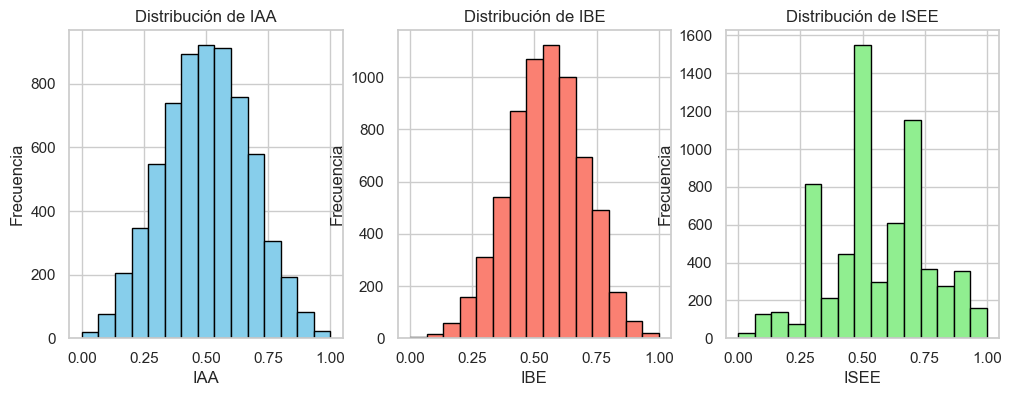

In [23]:
#analiszar las variables nuevas IAA, IBE, ISEE con relacion a grupo de edad


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['IAA'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribución de IAA')
plt.xlabel('IAA')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(df['IBE'], bins=15, color='salmon', edgecolor='black')
plt.title('Distribución de IBE')
plt.xlabel('IBE')
plt.ylabel('Frecuencia')    

plt.subplot(1, 3, 3)
plt.hist(df['ISEE'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribución de ISEE')
plt.xlabel('ISEE')
plt.ylabel('Frecuencia')


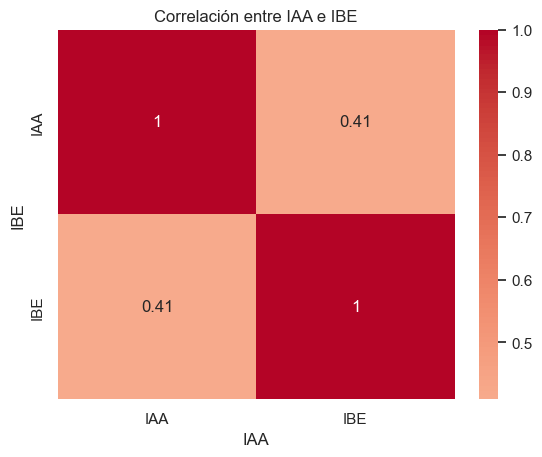

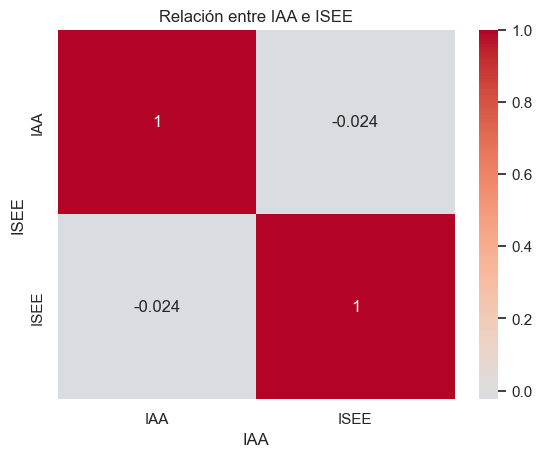

In [24]:
#correlacion entre IAA e IBE
plt.figure()
sns.heatmap(data=df[['IAA', 'IBE']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre IAA e IBE')
plt.xlabel('IAA')
plt.ylabel('IBE')
plt.show()


#relacion entre IAA e ISEE 
plt.figure()
sns.heatmap(data=df[['IAA', 'ISEE']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Relación entre IAA e ISEE')
plt.xlabel('IAA')
plt.ylabel('ISEE')
plt.show()

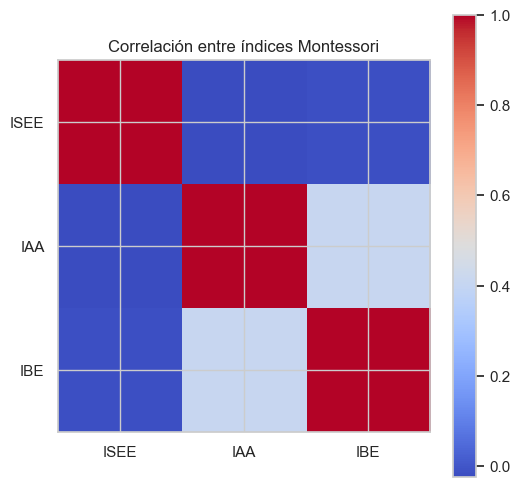

In [25]:
corr = df[["ISEE", "IAA", "IBE"]].corr()

plt.figure(figsize=(6,6))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlación entre índices Montessori")
plt.show()


In [27]:
#importando el IED por grupo de edad
df_ied = pd.read_csv("../data/ied_by_age_group.csv")
df_ied.head()

,Age_Group,IED
0,Adolescent,0.45
1,Child,0.55


In [ ]:
# NOTA: IED se asigna como constante (media global del archivo ied_by_age_group.csv)
# para todas las filas, porque el dataset StudentPerformanceFactors no contiene
# columna de edad ni grupo etario. Esto resulta en IED = 0.5 (aprox.) para todos
# los registros. Es una limitacion conocida: el IED solo se diferencia en la app
# cuando el usuario ingresa su grupo de edad manualmente.

## Exclusión de la variable IED

# Inicialmente se contempló la variable IED como parte del análisis.
# Sin embargo, al no disponerse de datos individuales vinculados al uso de pantalla,
# la variable presentaba un valor prácticamente constante en el conjunto de datos.

# Para evitar introducir ruido y variables sin varianza real en el análisis,
# se decidió excluir IED del pipeline de modelado.
# Esta decisión se documenta explícitamente como una limitación del dataset,
# y se propone como una línea de mejora futura la incorporación de datos observacionales individuales.


In [58]:
#verificación de nullos en columnas ISEE, IAA, IBE, IED
df[["ISEE", "IAA", "IBE",]].isna().sum()


ISEE    0
IAA     0
IBE     0
dtype: int64

In [30]:
# ============================================
# CONDICIÓN BASE MONTESSORI (LECTURA ABSOLUTA)
# ============================================

df["Condicion_Base_OK"] = ~(
    (df["ISEE"] <= 0.35) &
    (df["IAA"] <= 0.35) &
    (df["IBE"] <= 0.35)
)
df[["ISEE", "IAA", "IBE", "Condicion_Base_OK"]].head()

,ISEE,IAA,IBE,Condicion_Base_OK
0,0.475,0.454127,0.574257,True
1,0.300,0.164956,0.386139,True
2,0.500,0.721912,0.635644,True
3,0.300,0.703298,0.549505,True
4,0.625,0.589502,0.558416,True


# indice SCORE_DESAJUSTE 

In [ ]:
# NOTA: El target se construye a partir de las mismas features (ISEE, IAA, IBE).
# Esto es una limitacion conocida: el modelo aprende reglas definidas manualmente,
# no un ground truth externo. Ver GUIA_DE_CAMBIOS.md para mas detalle.


## Enfoque metodológico del proyecto

Este proyecto no tiene como objetivo realizar predicciones clínicas ni emitir diagnósticos educativos.
Siguiendo la pedagogía Montessori, el foco se sitúa en la **observación, comprensión y adaptación del entorno educativo**
a partir de patrones emergentes en el desarrollo del niño.

Por este motivo, el sistema combina:

- **Índices pedagógicos construidos por reglas expertas**, inspiradas en principios Montessori.
- **Técnicas de aprendizaje no supervisado (clustering)** para identificar perfiles educativos.
- **Interpretación pedagógica**, orientada a la toma de decisiones educativas y no a la predicción de resultados futuros.


## Score de Desajuste Educativo

El `Score_Desajuste` es un **índice pedagógico compuesto**, construido mediante reglas expertas a partir de tres dimensiones fundamentales:

- **ISEE**: Calidad del entorno preparado.
- **IAA**: Grado de autonomía funcional.
- **IBE**: Bienestar emocional.

Siguiendo los principios de la pedagogía Montessori, el bienestar emocional se considera una **condición habilitante**
del aprendizaje, por lo que se le asigna un mayor peso relativo en la construcción del índice.

Este score **no se utiliza como variable objetivo de ningún modelo predictivo**, sino como una métrica interpretativa
que permite contextualizar y comparar perfiles educativos obtenidos mediante técnicas de clustering.


In [ ]:
# Pesos pedagógicos basados en principios Montessori
W_ISEE = 0.30  # Entorno preparado
W_IAA  = 0.30  # Autonomía
W_IBE  = 0.40  # Bienestar emocional

df["Score_Desajuste"] = (
    W_ISEE * (1 - df["ISEE"]) +
    W_IAA  * (1 - df["IAA"]) +
    W_IBE  * (1 - df["IBE"])
)

df["Score_Desajuste"] = df["Score_Desajuste"].clip(0, 1)




In [32]:
#umbral pedagógico
THRESHOLD_PEDAGOGICO = 0.65


In [ ]:
# NOTA: Los scalers (MinMaxScaler) usados para construir ISEE, IAA, IBE fueron
# ajustados (fit) sobre el dataset completo antes del split train/test.
# Esto introduce un leve data leakage. Es una limitacion conocida documentada
# para mejora futura; corregirlo requiere reestructurar todo el pipeline
# de construccion de indices, lo cual excede el alcance actual.



## Escalado de variables y consideraciones sobre data leakage

El escalado de variables se aplica exclusivamente como una **transformación técnica previa al clustering no supervisado**,
limitada a las variables que definen el espacio de perfiles educativos (ISEE, IAA, IBE).

Dado que el proyecto no utiliza aprendizaje supervisado ni realiza predicciones,
no se emplea separación train/test.
El escalado no introduce data leakage en sentido metodológico, ya que no existe un proceso de entrenamiento predictivo,
sino una exploración de patrones globales en los datos.



# CLUSTERING 

In [39]:
# Seleccionamos únicamente los índices finales
X_cluster = df[["ISEE", "IAA", "IBE"]].copy()



In [ ]:
# Escalar los datos para clustering

# Variables utilizadas exclusivamente para clustering
X_cluster = df[["ISEE", "IAA", "IBE"]]

# Escalado SOLO para clustering (no aprendizaje supervisado)
scaler_cluster = MinMaxScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)


In [ ]:
# El escalado se aplica únicamente como transformación técnica
# previa al clustering no supervisado.
# No existe separación train/test ni aprendizaje predictivo,
# por lo que no hay riesgo de data leakage en sentido supervisado.


In [65]:
kmeans = KMeans(
    n_clusters=4,
    random_state=42,
    n_init=10
)

df["Perfil_Educativo"] = kmeans.fit_predict(X_cluster_scaled)


In [61]:
# construir df de centroides
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=["ISEE", "IAA", "IBE"]
)


In [62]:
# Reglas de etiquetado de perfiles educativos basados en los centroides
cluster_labels = {}

for idx, row in centroids.iterrows():
    if row["IBE"] < 0.4:
        cluster_labels[idx] = "Perfil con bienestar comprometido"
    elif row["ISEE"] > 0.6 and row["IAA"] > 0.6:
        cluster_labels[idx] = "Perfil educativo equilibrado"
    elif row["ISEE"] > row["IAA"]:
        cluster_labels[idx] = "Entorno favorable con autonomía en construcción"
    else:
        cluster_labels[idx] = "Perfil con autonomía alta y entorno exigente"


In [63]:
df["Perfil_Final"] = "Perfil educativo equilibrado"  # valor por defecto

# PRIORIDAD ABSOLUTA: condición base
df.loc[~df["Condicion_Base_OK"], "Perfil_Final"] = "Condición de base comprometida"

# SOLO si la condición base es adecuada, usamos el clustering
mask = df["Condicion_Base_OK"]

df.loc[mask, "Perfil_Final"] = df.loc[mask, "Perfil_Educativo"].map(cluster_labels)


In [64]:
# VERIFICACIÓN FINAL DE PERFILES PEDAGÓGICOS

df[[
    "ISEE",
    "IAA",
    "IBE",
    "Condicion_Base_OK",
    "Perfil_Educativo",
    "Perfil_Final",
    "Score_Desajuste"
]].head(40)



,ISEE,IAA,IBE,Condicion_Base_OK,Perfil_Educativo,Perfil_Final,Score_Desajuste
0,0.475,0.454127,0.574257,True,3,Entorno favorable con autonomía en construcción,0.491559
1,0.300,0.164956,0.386139,True,3,Entorno favorable con autonomía en construcción,0.706058
2,0.500,0.721912,0.635644,True,2,Perfil con autonomía alta y entorno exigente,0.379169
3,0.300,0.703298,0.549505,True,2,Perfil con autonomía alta y entorno exigente,0.479209
4,0.625,0.589502,0.558416,True,1,Perfil educativo equilibrado,0.412283
5,0.500,0.549229,0.734653,True,2,Perfil con autonomía alta y entorno exigente,0.391370
6,0.325,0.485151,0.405941,True,3,Entorno favorable con autonomía en construcción,0.594578
7,0.600,0.555083,0.299010,True,0,Entorno favorable con autonomía en construcción,0.533871
8,0.550,0.834224,0.504950,True,2,Perfil con autonomía alta y entorno exigente,0.382752
9,0.625,0.762888,0.863366,True,1,Perfil educativo equilibrado,0.238287


In [69]:
with open("../models/scaler.pkl", "wb") as f:
    pickle.dump(cluster_scaler, f)

with open("../models/kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)


In [66]:
df["Perfil_Educativo"].value_counts()


Perfil_Educativo
3    1750
2    1747
0    1612
1    1498
Name: count, dtype: int64

In [68]:
df.groupby("Perfil_Educativo")[["ISEE", "IAA", "IBE"]].mean()


,ISEE,IAA,IBE
Perfil_Educativo,,,
0,0.734026,0.367433,0.458943
1,0.729489,0.632551,0.637581
2,0.404393,0.634472,0.635425
3,0.407029,0.373687,0.462568


In [67]:

df_powerbi = df[
    [
        "ISEE", "IAA", "IBE",
        "Condicion_Base_OK",
        "Perfil_Final",
        "Score_Desajuste",
    ]
]

df_powerbi.to_excel("../data/powerbi_dataset.xlsx", index=False)
df_powerbi.head()

,ISEE,IAA,IBE,Condicion_Base_OK,Perfil_Final,Score_Desajuste
0,0.475,0.454127,0.574257,True,Entorno favorable con autonomía en construcción,0.491559
1,0.300,0.164956,0.386139,True,Entorno favorable con autonomía en construcción,0.706058
2,0.500,0.721912,0.635644,True,Perfil con autonomía alta y entorno exigente,0.379169
3,0.300,0.703298,0.549505,True,Perfil con autonomía alta y entorno exigente,0.479209
4,0.625,0.589502,0.558416,True,Perfil educativo equilibrado,0.412283


## Alcance y limitaciones del proyecto

Este proyecto no utiliza validación cruzada ni comparación de modelos supervisados,
ya que no dispone de una variable objetivo externa (ground truth) que permita evaluar capacidad predictiva.

El sistema debe entenderse como una herramienta de apoyo a la observación pedagógica,
no como un modelo de diagnóstico ni de predicción clínica.


